<a href="https://colab.research.google.com/github/swwilso/QuantumMachineLearning/blob/main/Qiskit_Quantum_Circuits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install qiskit[visualization]

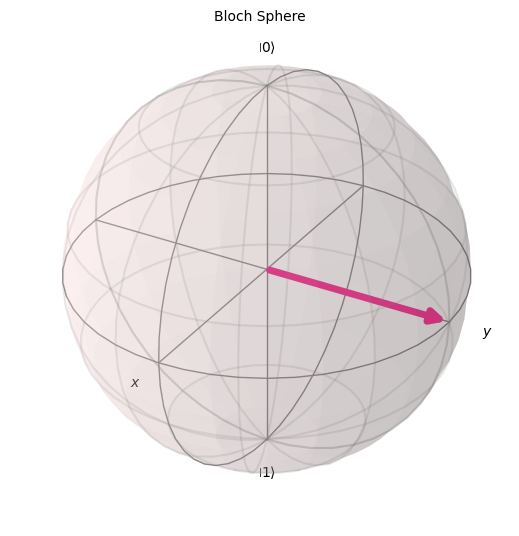

In [12]:
## import the libraries
import numpy as np
from qiskit import *
from qiskit.visualization import plot_bloch_vector
%matplotlib inline
plot_bloch_vector([0,1,0], title="Bloch Sphere")

In [13]:
from math import pi
from qiskit.visualization import plot_bloch_multivector
#X-gate on a |0> qubit
qc = QuantumCircuit(1)
qc.x(0)
qc.draw()

┌───┐
q: ┤ X ├
   └───┘

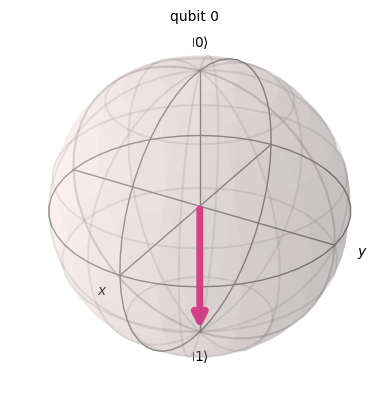

In [14]:
# Verify The result
backend = Aer.get_backend('statevector_simulator') # Simulate
out = execute(qc,backend).result().get_statevector() # Do the simulation, returning the statevector
plot_bloch_multivector(out) # Display the output state vector

In [15]:
# Create Hadamard gate for the X-measurement function:
def x_measurement(qc,qubit,cbit):
    """Measure 'qubit' in the X-basis, and store the result in 'cbit'"""
    qc.h(qubit)
    qc.measure(qubit, cbit)
    qc.h(qubit)
    return qc
initial_state = [0,1]
# Initialise our qubit and measure it
qc = QuantumCircuit(1,1)
qc.initialize(initial_state, 0)
x_measurement(qc, 0, 0)  # measure qubit 0 to classical bit 0
qc.draw()

┌─────────────────┐┌───┐┌─┐┌───┐
  q: ┤ Initialize(0,1) ├┤ H ├┤M├┤ H ├
     └─────────────────┘└───┘└╥┘└───┘
c: 1/═════════════════════════╩══════
                              0

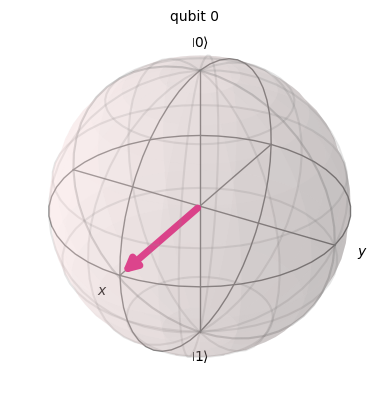

In [16]:
# Verify The result
backend = Aer.get_backend('statevector_simulator') # Simulate
out = execute(qc,backend).result().get_statevector() # Do the simulation, returning the statevector
plot_bloch_multivector(out) # Display the output state vector

{'00': 495, '11': 505}


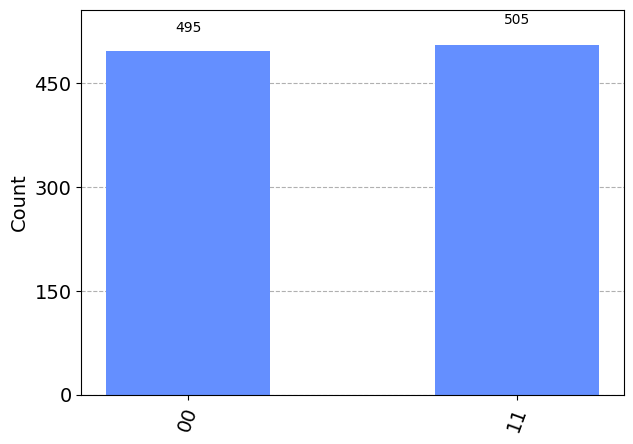

In [20]:
# quantum circuit to create a Bell state
bell = QuantumCircuit(2, 2)
bell.h(0)
bell.cx(0, 1)
meas = QuantumCircuit(2, 2)
meas.measure([0,1], [0,1])
# execute the quantum circuit
backend = BasicAer.get_backend('qasm_simulator') # the device to run on
circ = bell & meas
result = execute(circ, backend, shots=1000).result()
counts  = result.get_counts(circ)
print(counts)
from qiskit.visualization import plot_histogram
plot_histogram(counts)